In [ ]:
#1. Importing the required libraries for EDA

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps



%matplotlib inline     
sns.set(color_codes=True)

In [3]:
#2. Loading the data into the data frame

In [5]:
df=pd.read_csv('/Users/shreyasingh/Downloads/EDA2/adult_with_headers.csv')

In [7]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
# Check for missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [21]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [33]:
# Identifying numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns


In [35]:
# Applying Standard Scaling
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df[numerical_features]),
                                  columns=numerical_features)

In [39]:
# Applying Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df[numerical_features]),
                                  columns=numerical_features)


In [43]:
# Printing a sample of the scaled data
print("\nStandard Scaled Data (first 5 rows):\n", df_standard_scaled.head())
print("\nMin-Max Scaled Data (first 5 rows):\n", df_minmax_scaled.head())



Standard Scaled Data (first 5 rows):
         age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  

Min-Max Scaled Data (first 5 rows):
         age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000    

In [47]:
# Identifying categorical variables
categorical_features = df.select_dtypes(include=['object']).columns


In [51]:
# Split into categories with less than 5 and more than 5 unique values
less_than_5 = [col for col in categorical_features if df[col].nunique() < 5]
more_than_5 = [col for col in categorical_features if df[col].nunique() >= 5]


In [65]:
# One-Hot Encoding  
ohe = OneHotEncoder(sparse_output=False, drop='first')  # Avoid multicollinearity
one_hot_encoded = pd.DataFrame(ohe.fit_transform(df[less_than_5]),
                               columns=ohe.get_feature_names_out(less_than_5))


In [67]:
# 2. Label Encoding for variables with 5 or more unique categories
label_encoders = {}
label_encoded = pd.DataFrame()

for col in more_than_5:
    le = LabelEncoder()
    label_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [71]:
# Combine the original dataset with encoded features
data_encoded = pd.concat([df.drop(columns=less_than_5 + more_than_5), one_hot_encoded, label_encoded], axis=1)


In [73]:
# Display a sample of the encoded data
print("\nOne-Hot Encoded Data (first 5 rows):\n", one_hot_encoded.head())
print("\nLabel Encoded Data (first 5 rows):\n", label_encoded.head())
print("\nCombined Encoded Data (first 5 rows):\n", data_encoded.head())


One-Hot Encoded Data (first 5 rows):
    sex_ Male  income_ >50K
0        1.0           0.0
1        1.0           0.0
2        1.0           0.0
3        1.0           0.0
4        0.0           0.0

Label Encoded Data (first 5 rows):
    workclass  education  marital_status  occupation  relationship  race  \
0          7          9               4           1             1     4   
1          6          9               2           4             0     4   
2          4         11               0           6             1     4   
3          4          1               2           6             0     2   
4          4          9               2          10             5     2   

   native_country  
0              39  
1              39  
2              39  
3              39  
4               5  

Combined Encoded Data (first 5 rows):
    age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40 

In [75]:
# 1. Creating New Features

df['capital_net'] = df['capital_gain'] - df['capital_loss']

In [77]:
# New Feature 2: "work_hours_per_year" = hours_per_week * 52
df['work_hours_per_year'] = df['hours_per_week'] * 52

In [81]:
# Display new features
print("\nSample of new features (first 5 rows):\n", df[['capital_net', 'work_hours_per_year']].head())



Sample of new features (first 5 rows):
    capital_net  work_hours_per_year
0         2174                 2080
1            0                  676
2            0                 2080
3            0                 2080
4            0                 2080


In [83]:
#Identifying Skewed Numerical Features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numerical_features].skew().sort_values(ascending=False)
print("\nSkewness of Numerical Features:\n", skewness)



Skewness of Numerical Features:
 capital_gain           11.953848
capital_net            11.871934
capital_loss            4.594629
fnlwgt                  1.446980
age                     0.558743
work_hours_per_year     0.227643
hours_per_week          0.227643
education_num          -0.311676
dtype: float64


In [85]:
# Apply log transformation to the most skewed feature 
df['log_capital_gain'] = np.log1p(df['capital_gain'])

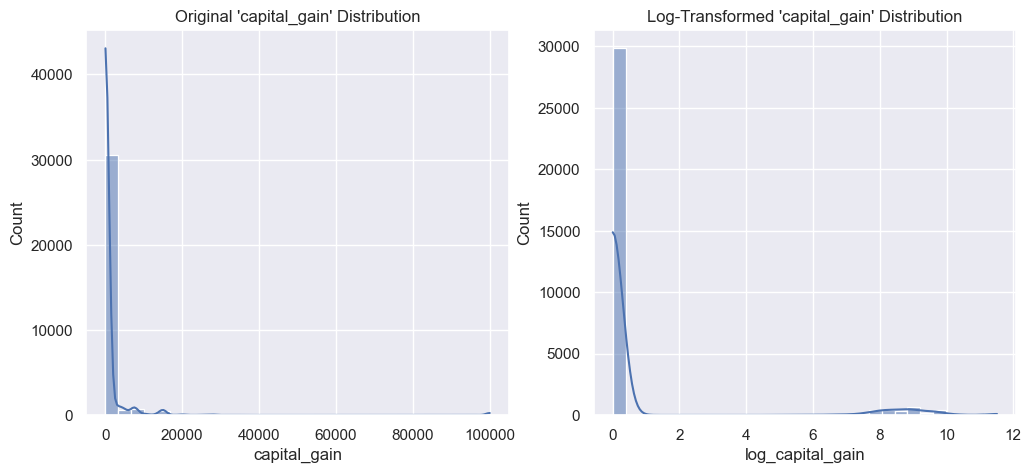

In [93]:
# Plot the effect of log transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['capital_gain'], kde=True, bins=30)
plt.title("Original 'capital_gain' Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['log_capital_gain'], kde=True, bins=30)
plt.title("Log-Transformed 'capital_gain' Distribution")
plt.show()


In [97]:
#identifying and Removing Outliers using Isolation Forest
 
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [99]:
# Fit the Isolation Forest
isolation_forest = IsolationForest(random_state=42, contamination=0.01)
outliers = isolation_forest.fit_predict(df[numerical_features])

In [101]:
# Add the outlier information to the dataset
df['outlier'] = outliers

In [103]:
# Remove outliers
data_cleaned = df[df['outlier'] == 1].drop(columns=['outlier'])


In [107]:

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {data_cleaned.shape}")

Original dataset shape: (32561, 19)
Cleaned dataset shape: (32235, 18)


In [109]:
# Applying PPS (Predictive Power Score)
 
pps_matrix = pps.matrix(data_cleaned)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/opt/anaconda3/lib/python

In [111]:
# Filter for meaningful relationships (PPS > 0)
pps_filtered = pps_matrix[pps_matrix['ppscore'] > 0][['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False)


In [113]:
# Display the top relationships based on PPS
print("\nTop Feature Relationships (PPS):\n", pps_filtered.head())


Top Feature Relationships (PPS):
                   x               y  ppscore
0               age             age      1.0
171             sex             sex      1.0
75    education_num       education      1.0
76    education_num   education_num      1.0
95   marital_status  marital_status      1.0


In [115]:
#Compare PPS findings with correlation matrix
correlation_matrix = data_cleaned.corr()

/var/folders/f9/_4mkkcf11bsbsmzmgybr1twr0000gn/T/ipykernel_72064/4055947333.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_cleaned.corr()


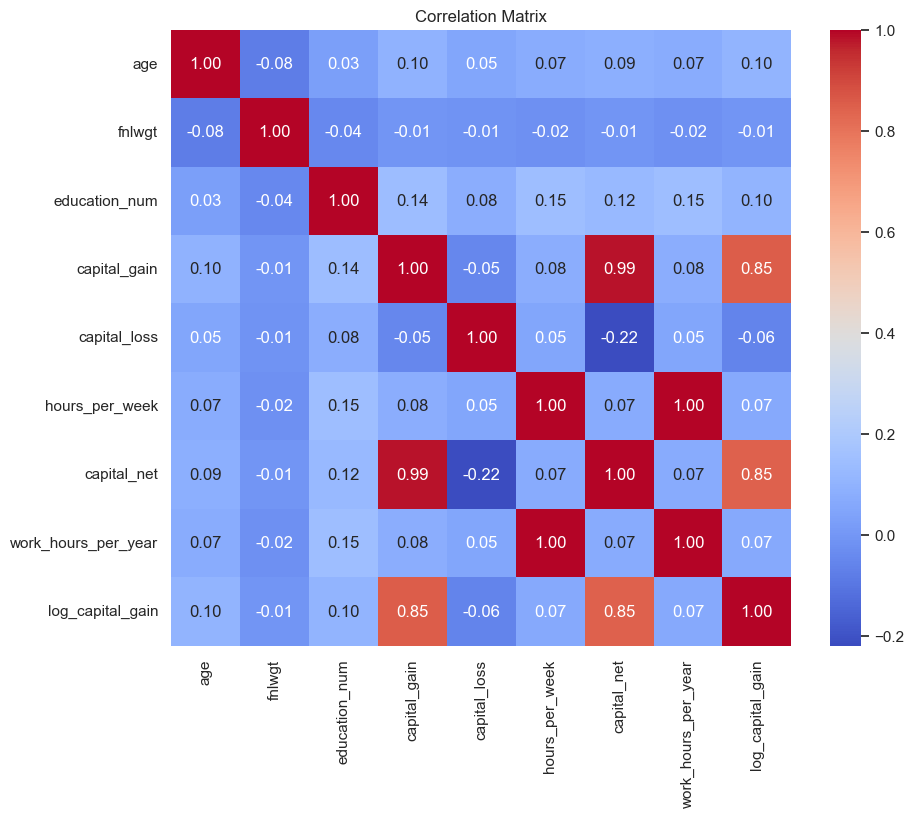

In [117]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
